# Lecture 10 - Plotting

In parallel with statistical (or machine learning) skills, the ability to produce clear, informative graphics is among the most important skills a biologist can develop. While conceptually easier to grasp than modelling, good scientific graphics require as much (or more) time to produce than their underlying analyses. Similar to modelling itself, approaches to graphics vary from out of the box, **high-level** approaches, such as [ggplot](http://ggplot.yhathq.com), that make intelligent assumptions about how to make things look good, and **low-level** approaches, such as the *base* plotting package in R, that make very few assumptions while allowing for maximum flexibility. While high-level packages are a great innovation that help save time and can produce production-quality graphics, low-level skills are ultimately more powerful, putting no limits on what you can produce. 

An example from 2015:

<img src="Figure_2.png" alt="Drawing" style="width: 800px;"/>

This is a somewhat complex plot to produce in anything but a base-level plotting package - each point, line, shade, and colour has been custom edited, making automation meaningless.

So if low-level graphics are the way to produce final, custom graphics, why learn anything else? Because final graphics are only one component of the analytical process useful to biologists; what comes first is data exploration, looking and thinking about complex data to see what the key patterns are and to consider things you may not have thought of before you designed the study. This figure (stolen from [Sean Anderson's webiste](http://seananderson.ca)) illustrates these tradeoffs nicely:

<img src="gg-vs-base.png" alt="Drawing" style="width: 800px;"/>


Here you can see that R base graphics is initially more time consuming than high level graphics in something like ggplot, and that base graphics generally don't scale well (in terms of your time) as data becomes more complex. As Anderson articulately states:

> Good graphical displays of data require rapid iteration and lots of exploration. If it takes you hours to code a plot in base graphics, you're unlikely to throw it out and explore other ways of visualizing the data, and you're unlikely to explore all the dimensions of the data.

To get started, we will do some low-level R base package plotting, then will get into ggplot to see how to use both systems.


### Base R plotting

The 'base' package in R - that this, the functions that come pre-loaded with every installation - inludes all the low-level plotting functions that underpin how R produces graphics. High-level graphics packages manipulate these functions (under the hood) to produce graphics that guess at what a 'good' should look like, with a minimum number of commands. But these underlying commands are important if you want to re-produce a good graphic. 

**NB**: some R users advocate for creating your graphics in R and then manipulating them in something like Adobe Photoshop or Illustrator before submission. In some cases this is necessary (essential even) but in my experience of revision after revision, it is far better to **do as much as possible in your plot scripts**, because every time you revise an image you'll have to re-open your graphics program and do all the tweaks over again. So basic plotting...

To be on the same page, let's open up the baseball batting data:

In [3]:
# Import batting data
mlbdata = na.omit(read.csv("mlb2017_batting.txt"))

The most basic plotting function is, unsurprisingly, `plot()`. So let's plot something and see what happens:

In [4]:
head(mlbdata)

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,⋯,SLG,OPS,OPS.,TB,GDP,HBP,SH,SF,IBB,Pos.Summary
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,2,Jose Abreu\abreujo02,30,CHW,AL,156,675,621,95,189,⋯,0.552,0.906,141,343,21,15,0,4,6,*3D
3,3,Cristhian Adames#\adamecr01,25,COL,NL,12,14,13,1,0,⋯,0.000,0.071,-80,0,0,0,0,0,0,/346
5,5,Lane Adams\adamsla01,27,ATL,NL,85,122,109,19,30,⋯,0.468,0.807,110,51,3,1,1,1,0,78/9
6,6,Matt Adams*\adamsma01,28,TOT,NL,131,367,339,46,93,⋯,0.522,0.841,117,177,5,1,0,4,5,37/D
7,7,Matt Adams*\adamsma01,28,STL,NL,31,53,48,4,14,⋯,0.396,0.735,94,19,0,0,0,1,0,/73D
8,8,Matt Adams*\adamsma01,28,ATL,NL,100,314,291,42,79,⋯,0.543,0.858,121,158,5,1,0,3,5,37


In [5]:
# Make plots a resonable size
options(repr.plot.width=4, repr.plot.height=4)

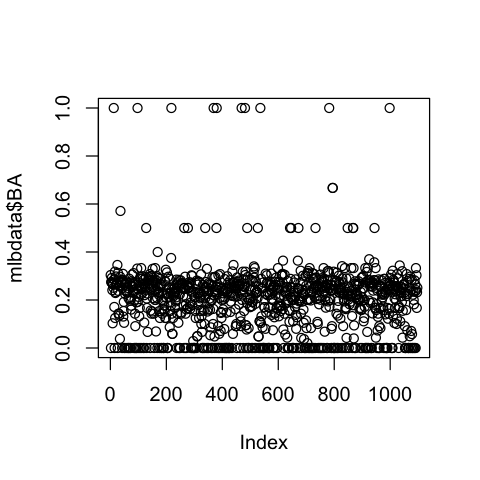

In [6]:
# Plot batting averages
plot(mlbdata$BA)

What's going on? We passed the plot a single column of batting averages but there is an index value on the x-axis too. This is because `plot()` is for **biplots** x vs y plots of two variables in 2 dimensional-space. So let's put something more interesting on the x-axis:

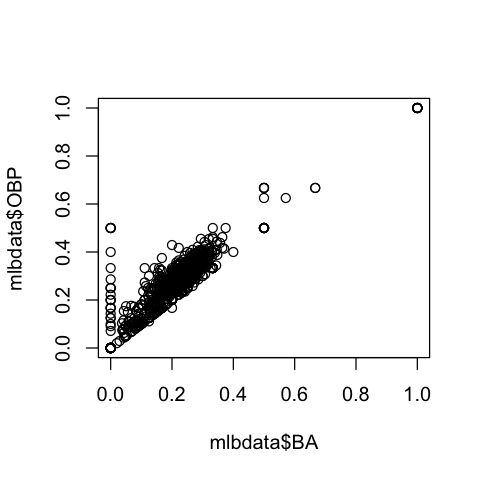

In [7]:
# Plot batting averages
plot(mlbdata$BA,mlbdata$OBP)

Now we have batting average on the x-axis vs on-base percentage on the y-axis. Those labels look awful though, so we need to add new ones:

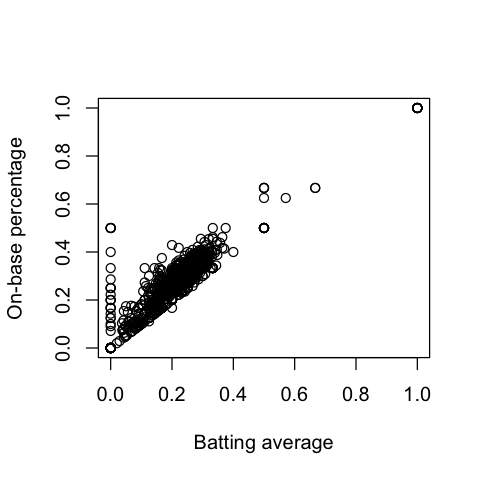

In [31]:
# Plot batting averages
plot(mlbdata$BA,mlbdata$OBP, xlab="Batting average", ylab="On-base percentage")

In [27]:
?plot

Looking better, but how about those zeros? Pitchers? Let's add some colour to see. R has a wide array of built in colors that can be specified by default numbering, name, or hex code. Let's first look at the base colors:

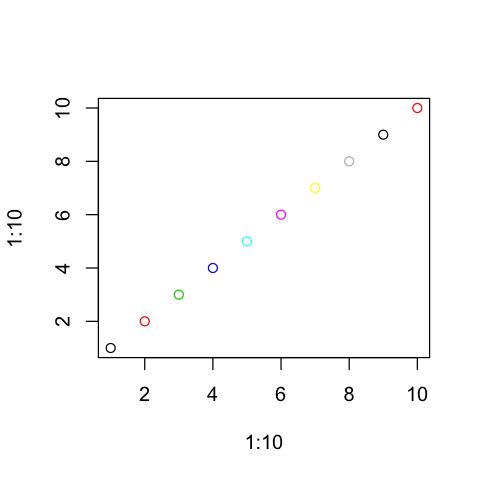

In [40]:
plot(1:10,1:10,col=1:10)

If we think that pitchers aren't great batters we can idenify them on the plot using colors. First we need to identify them in our dataframe. Because baseball likes advanced analystics and making things confusing, pitchers are denoted by the position number 1:

In [28]:
mlbdata$Pos.Summary[1:20]

[1] *3D     /346    78/9    37/D    /73D    37      9/D     1       67/453D
[10] 3/D5    6       /1      4       4/89657 1       2/3     /79     8/7    
[19] 97/8D   8/79   
420 Levels:  *2 *2/3 *2/3D *2/D *2D *2D/3 *3 *3/4D *3/5D *3/5D4 *3/D ... D97

In [34]:
grepl("1",mlbdata$Pos.Summary[1:20])*1+1

[1] 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1

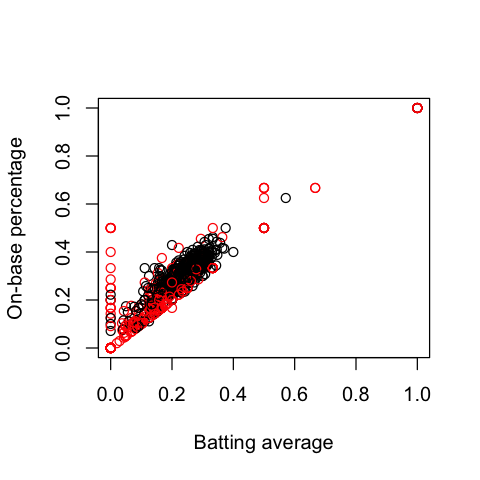

In [29]:
# Plot batting averages
plot(mlbdata$BA,mlbdata$OBP, xlab="Batting average", ylab="On-base percentage", col=grepl("1",mlbdata$Pos.Summary)*1+1)

That looks ok, but the colours are ugly:

In [30]:
c("darkgrey","dodgerblue")[grepl("1",mlbdata$Pos.Summary[1:20])*1+1]

[1] "darkgrey"   "darkgrey"   "darkgrey"   "darkgrey"   "darkgrey"  
 [6] "darkgrey"   "darkgrey"   "dodgerblue" "darkgrey"   "darkgrey"  
[11] "darkgrey"   "dodgerblue" "darkgrey"   "darkgrey"   "dodgerblue"
[16] "darkgrey"   "darkgrey"   "darkgrey"   "darkgrey"   "darkgrey"

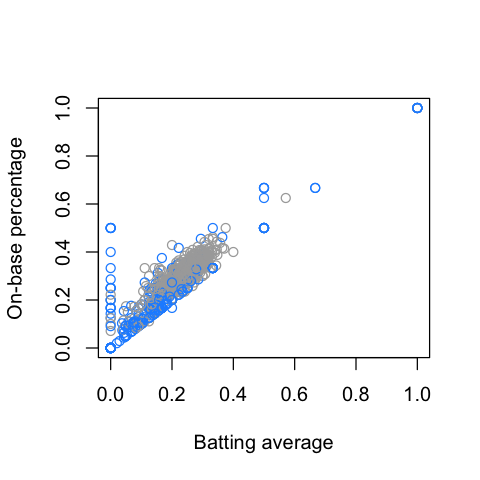

In [32]:
# Plot batting averages
plot(mlbdata$BA,mlbdata$OBP, xlab="Batting average", ylab="On-base percentage", col=c("darkgrey","dodgerblue")[grepl("1",mlbdata$Pos.Summary)*1+1])

So mostly pitchers (in blue) who didn't get a hit but ended up on base with a walk (or were hit by the pitcher); what about those along the 1:1 line?

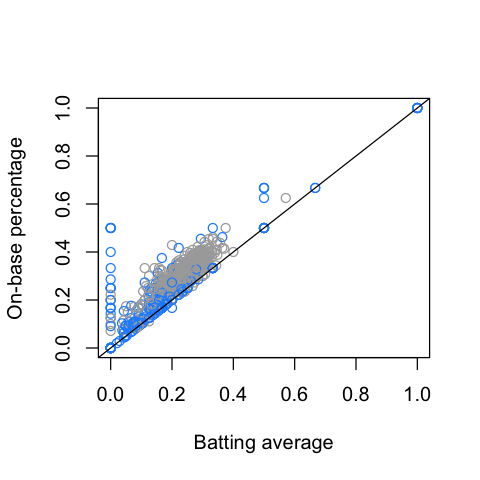

In [41]:
# Plot batting averages
plot(mlbdata$BA,mlbdata$OBP, xlab="Batting average", ylab="On-base percentage", col=c("darkgrey","dodgerblue")[grepl("1",mlbdata$Pos.Summary)*1+1])
abline(0,1)
#abline(lm(mlbdata$OBP~mlbdata$BA), lty=2)

But it looks like there is at least one player with a higher batting average than on-base percentage - how is this possible? And who is it?

---
# Task 1
---

Use the `text()` function to plot the name of the player(s) who have a higher batting average than on-base percentage next to their point on the plot above.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


In truth there are DOZENS of paramters that we can manipulate with base plotting in R - literally everything is up for grabs - so much so that listing them here is kind of redundant (a really good set of comprehensive examples from Murray Logan is available here: http://users.monash.edu.au/~murray/AIMS-R-users/ws/ws11.html). So a few principles:

## Figure dimensions

Not the most exciting topic you might say but having control of the output size of your figures is a huge deal if you're trying to get published in a [tabloid journal](https://www.sciencemag.org), where  dimensions are **VERY SPECIFIC**:http://www.sciencemag.org/authors/instructions-preparing-initial-manuscript (BTW they even have specific $\LaTeX$ [instructions](http://www.sciencemag.org/authors/preparing-manuscripts-using-latex)). In any case, it matters.



<img src="figureanatomy1.png" alt="Drawing" style="width: 600px;"/>



<img src="figureanatomy2.png" alt="Drawing" style="width: 600px;"/>



<table class="paramsTablea">
	<tr>
	  <th>Parameter</th><th>Value</th><th>Description</th>
	</tr>
	<tr>
	  <td class="Rc">din,fin,pin</td><td class="Rc">=c(width,height)</td><td>Dimensions (width and height) of the device, figure and plotting regions (in inches)</td>
	</tr>
	<tr>
	  <td class="Rc">fig</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the figure region within the device.  Coordinates expressed as a fraction of the device region.</td>
	</tr>
	<tr>
	  <td class="Rc">mai,mar</td><td class="Rc">=c(bottom,left,top,right)</td><td>Size of each of the four figure margins in inches and lines of text (relative to current font size).</td>
	</tr>
	<tr>
	  <td class="Rc">mfg</td><td class="Rc">=c(row,column)</td><td>Position of the currently active figure within a grid of figures defined by either mfcol or mfrow.</td>
	</tr>
	<tr>
	  <td class="Rc">mfcol,mfrow</td><td class="Rc">=c(rows,columns)</td><td>Number of rows and columns in a multi-figure grid.</td>
	</tr>
	<tr>
	  <td class="Rc">new</td><td class="Rc">=TRUE or =FALSE</td><td>Indicates whether to treat the current figure region as a new frame (and thus begin a new plot over the top of the previous plot (TRUE) or to allow a new high level plotting function to clear the figure region first (FALSE).</td>
	</tr>
	<tr>
	  <td class="Rc">oma,omd,omi</td><td class="Rc">=c(bottom,left,top,right)</td><td>Size of each of the four outer margins in lines of text (relative to current font size), inches and as a fraction of the device region dimensions</td>
	</tr>
	<tr>
	  <td class="Rc">plt</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the plotting region expressed as a fraction of the device region.</td>
	</tr>
	<tr>
	  <td class="Rc">pty</td><td class="Rc">="s" or "m"</td><td>Type of plotting region within the figure region.  Is the plotting region a square (="s") or is it maximized (="m") to fit within the shape of the figure region.</td>
	</tr>
	<tr>
	  <td class="Rc">usr</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the plotting region corresponding to the axes limits of the plot.</td>
	</tr>
  </table>

**NB** `par()` is the function you need to use the parameters above.

From this table and the figures above you can see which dimensions affect which attributes of figure output, with particular emphasis on the fact that there are options for output in inches and output in relative dimensions. If you're exporting a file for publication, USE INCHES. The reason is illustrated here: 

<img src="Picture1.png" alt="Drawing" style="width: 600px;"/>

<img src="Picture2.png" alt="Drawing" style="width: 600px;"/>


These two figures have the same data, with the same point sizes but the one on top is relative while the one below is in inches. Deep stuff, but a major deal if you're publishing a paper with one common legend. 


## Exporting figures

R has several default export options, depending on what kind of file you'd like to create:

1. `jpeg()` - a standard raster graphic
2. `pdf()` - a standard vector graphic



In [37]:
#ADD Dimensions explorting stuff

par(mar=c(1,1,1,1))
jpeg('myplot.jpg', width=2, height=2, units='in', res = 300)
plot(1,1)
dev.off()




pdf 
  2

---
# Task 2
---

Plot the baseball hitting plot from Task 1 in the same aspect ratio as the typical movie theatre, at the recommended figure resolution for **final** publication of a jpeg in *Science*. You will need the `jpeg()` function to do this.

In [ ]:
?jpeg

In [ ]:
# Your answer here (feel free to add cells to complete your answer)
par(mar=c(1,1,1,1))
jpeg('myplot.jpg', width=2, height=2, units='in', res = 300)
plot(1,1)
dev.off()

## High-level plotting in the base package

Much of what we've looked at so far is low-level in the base package, but the base package is not without it's own virtues. Specifically there are a set of high(er) level plotting functions that are workhorses for using graphics in R.

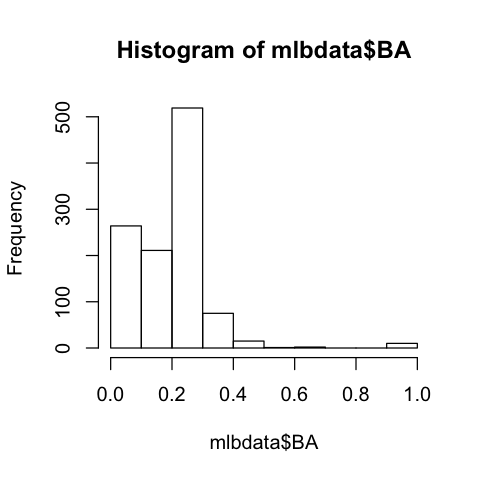

In [8]:
# hist
hist(mlbdata$BA)

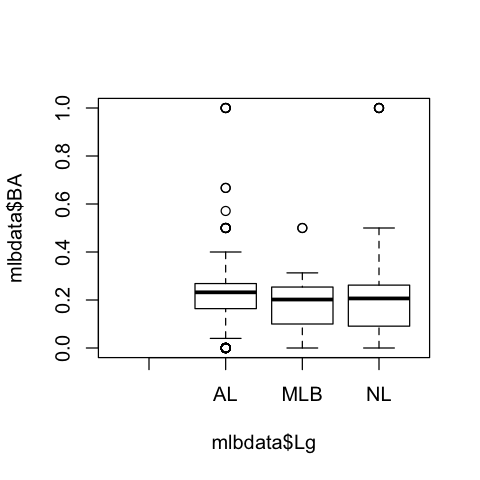

In [51]:
# boxplot
boxplot(mlbdata$BA~mlbdata$Lg)

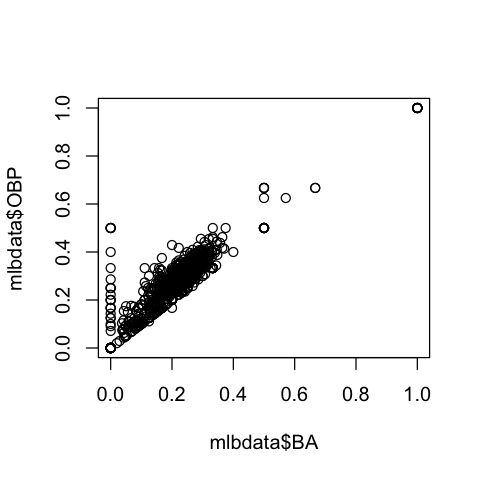

In [12]:
# scatterplot
plot(mlbdata$BA,mlbdata$OBP)

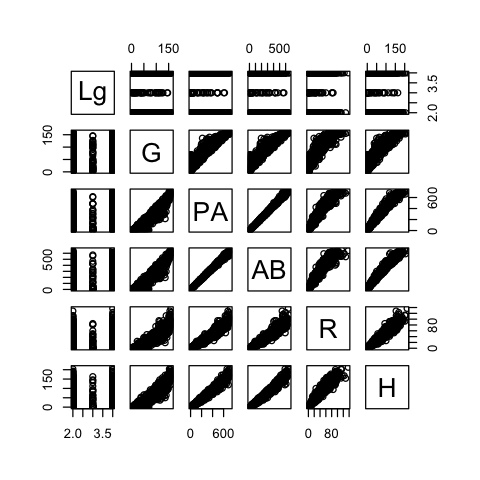

In [20]:
# Scatterplot matricies

pairs(mlbdata[,5:10])

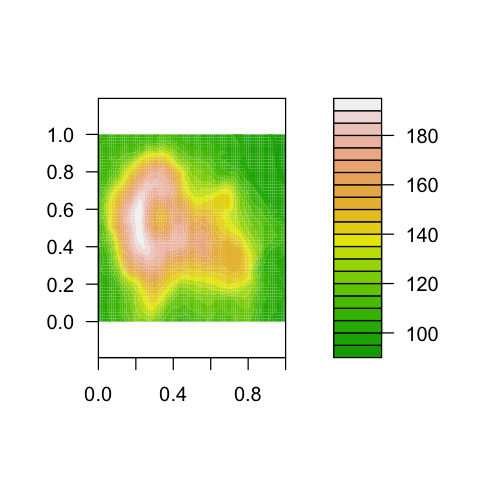

In [13]:
# Contour
?contour
data(volcano)
filled.contour(volcano, color = terrain.colors, asp = 1)

## Task 2

Create a plot of the number of RBIs over batting average, with solid points where shapes denote pichers and shape denotes league.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)

# ggplotting

Well, here we are - at the alter of H Wickham himself (praises be). The thing that Hadley Wickham is best known for is the ggplot package for R - a very high level graphics package that implemented the theory of entire book called [*The Grammar of  Graphics*](https://www.springer.com/us/book/9781475731002), which presents

> a unique foundation for producing almost every quantitative graphic found in scientific journals, newspapers, statistical packages, and data visualization systems

The history of how this came to be is outlined by the author Leland Wilkinson:

> Before writing the graphics for SYSTAT in the 1980's, I began by teaching a seminar in statistical graphics and collecting as many different quantitative graphics as I could find. I was determined to produce a package that could draw every statistical graphic I had ever seen. The structure of the program was a collection of procedures named after the basic graph types they produced. The graphics code was roughly one and a half megabytes in size. In the early 1990's, I redesigned the SYSTAT graphics package using object-based technology. I intended to produce a more comprehensive and dynamic package. I accomplished this by embedding graphical elements in a tree structure. Rendering graphics was done by walking the tree and editing worked by adding and deleting nodes. The code size fell to under a megabyte. In the late 1990's, I collaborated with Dan Rope at the Bureau of Labor Statistics and Dan Carr at George Mason University to produce a graphics production library called GPL, this time in Java. Our goal was to develop graphics components. This book was nourished by that project. So far, the GPL code size is under half a megabyte.

This is unbeliveable. To have derived a comprehensive theory for all scientific graphics is an astonishing feat. It also lends a particular flavour to things, which some find more or less to their taste (less to mine) but it notheless is one of the great books of 20th Century scientific computing. So what does this look like in `ggplot`?

### Core ggplot

(It's a good idea to open up the `ggplot` [documentation](https://ggplot2.tidyverse.org/reference/) and keep it in another browser tab. There is also a really useful 'ggplot' [cheatsheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf).

Let's look at some illustrative ggplot2 code:


x,y,group1,group2
<int>,<dbl>,<fct>,<fct>
1,0.66438273,a,1
2,0.53899513,a,1
3,0.87216127,a,1
4,0.01474028,a,1
5,0.52239063,b,1
6,0.19797909,b,1


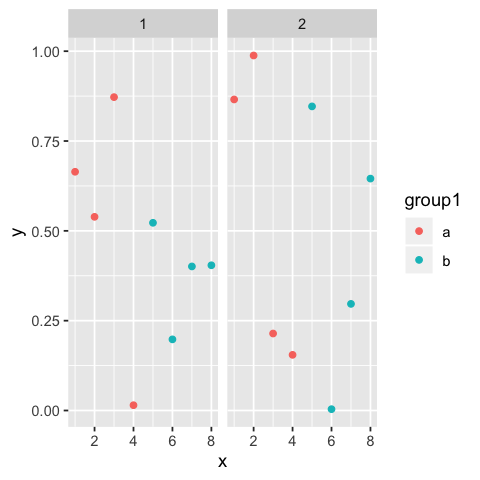

In [35]:
library(ggplot2)
# fake data:
d <- data.frame(x = c(1:8, 1:8), y = runif(16),
  group1 = rep(gl(2, 4, labels = c("a", "b")), 2),
  group2 = gl(2, 8))
head(d)
ggplot(data = d, aes(x = x, y = y, colour = group1)) + geom_point() +
  facet_grid(~group2)

The basic format in this example includes the core syntax of ggplot plus one additional optional specification:

1.  `ggplot()`: start an object and specify the data

2.  `aes()`: specifies the "aesthetic" elements; a legend is automatically created

3.  `geom_point()`: we want a scatter plot; this is called a "geom"

4.  `facet_grid()`: specifies the "faceting" or panel layout

There are also statistics, scales, and annotation options, among others. At a minimum, you must specify the data, some aesthetics, and a geom. Faceting is useful when you want to create the same figure using subsets of your data.

As outlined by Wilkinson, grammar graphics are made "*by walking the tree and editing worked by adding and deleting nodes*", leading to the distinctive `ggplot` approach of piping elements using a `+` sign:

This additive quality is similar to piping, where you start with a basic element and add complexity one element at a time. As a result **later entries trump earlier ones.** 

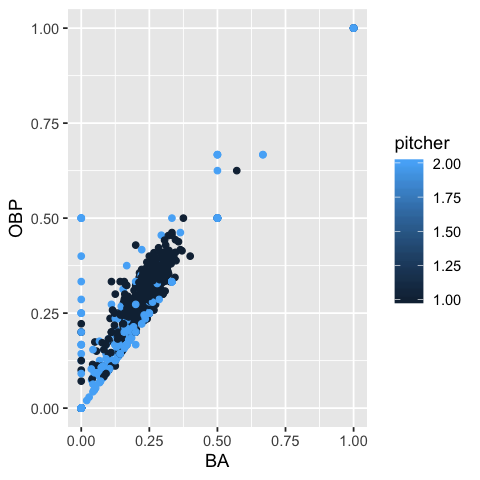

In [53]:
pitcher = grepl("1",mlbdata$Pos.Summary)*1+1
ggplot(data=mlbdata)+
aes(BA,OBP,colour=pitcher)+
geom_point()

You can see by comparison with our default base plot for the same data that `ggplot` makes some decent assumptions about what looks nice. But the legend shows us that it is treating the variable pitcher strangely. Any ideas why?

But we can easily change these default settings and customize the figure:

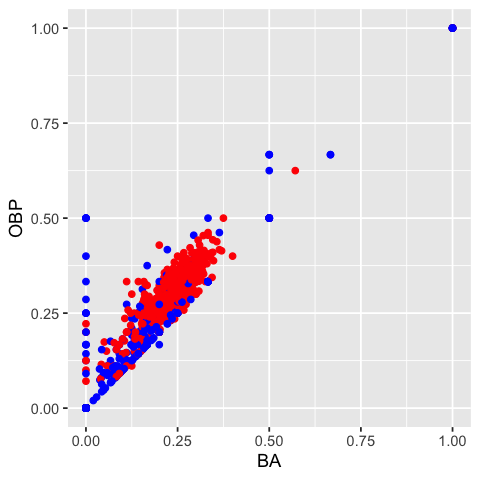

In [36]:
pitcher = c("red","blue")[grepl("1",mlbdata$Pos.Summary)*1+1]
ggplot(data=mlbdata)+
aes(BA,OBP)+
geom_point(colour=pitcher)

Lovely! 

**Note** nesting the `aes()` argument within one of the other ggplot functions will map those aesthetic arguments  to the data, assigning the colour or shape automatically. 

## Aesthetics
Aesthetics refer to the attributes of the data you want to display. They map the data to an attribute (such as the size or shape of a symbol) and generate an appropriate legend. Aesthetics are specified with the `aes()` function.

As an example, the aesthetics available for `geom_point()` are: `x`, `y`, `alpha`, `colour`, `fill`, `shape`, and `size`. Read the help files to see the aesthetic options for the geom you’re using. They’re generally self explanatory. Aesthetics can be specified within the main `ggplot()` function or within a `geom()`. If they’re specified within the main `ggplot()` function then they apply to all geoms you specify.

Note the important difference between specifying characteristics like colour and shape inside or outside the `aes()` function: those inside the `aes()` function are assigned the colour or shape automatically based on the data.

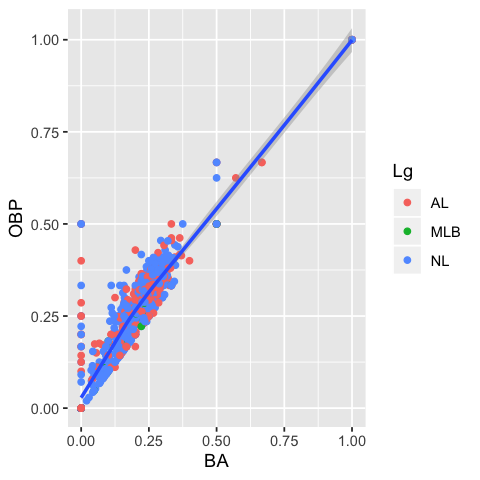

In [63]:
ggplot(mlbdata, aes(BA, OBP)) + 
geom_point(aes(color = Lg))

## Geoms

There's a bit of lingo to `ggplot` that can take some getting used to. Saying 'aesthetics' a lot for example. Geoms is another - `geoms` in ggplot refers to geometric objects, or what we typically think of in a plot. There are rather a lot of them:

`geom_abline() geom_hline() geom_vline()` - Reference lines: horizontal, vertical, and diagonal

`geom_bar() geom_col() stat_count()` - Bar charts

`geom_bin2d() stat_bin_2d()` - Heatmap of 2d bin counts

`geom_blank()` - Draw nothing

`geom_boxplot() stat_boxplot()` - A box and whiskers plot (in the style of Tukey)

`geom_contour() stat_contour()` - 2d contours of a 3d surface

`geom_count() stat_sum()` - Count overlapping points

`geom_density() stat_density()` - Smoothed density estimates

`geom_density_2d() stat_density_2d()` - Contours of a 2d density estimate

`geom_dotplot()` - Dot plot 

`geom_errorbarh()` - Horizontal error bars

`geom_hex() stat_bin_hex()` - Hexagonal heatmap of 2d bin counts

`geom_freqpoly() geom_histogram() stat_bin()` - Histograms and frequency polygons

`geom_jitter()` - Jittered points

`geom_crossbar() geom_errorbar() geom_linerange() geom_pointrange()` - Vertical intervals: lines, crossbars & errorbars

`geom_map()` -Polygons from a reference map

`geom_path() geom_line() geom_step()` - Connect observations

`geom_point()` - Points

`geom_polygon()` -  Polygons

`geom_qq_line() stat_qq_line() geom_qq() stat_qq()` - A quantile-quantile plot

`geom_quantile() stat_quantile()` - Quantile regression

`geom_ribbon() geom_area()` - Ribbons and area plots
	
`geom_rug()` - Rug plots in the margins
	
`geom_segment() geom_curve()` - Line segments and curves

`geom_smooth() stat_smooth()` - Smoothed conditional means
	
`geom_spoke()` - Line segments parameterised by location, direction and distance

`geom_label() geom_text()` - Text
	
`geom_raster() geom_rect() geom_tile()`- Rectangles
	
`geom_violin() stat_ydensity()` - Violin plot
	
`stat_sf() geom_sf() geom_sf_label() geom_sf_text() coord_sf()` - Visualise sf objects

## Task 3
Plot the distribution in batting average by league using violin plots:

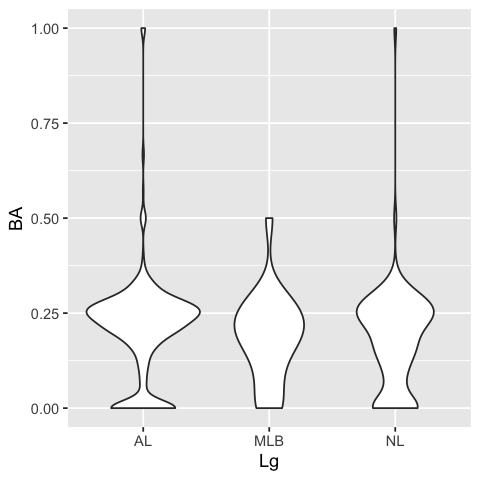

In [61]:
# Your answer here (feel free to add cells to complete your answer)
ggplot(mlbdata, aes(Lg, BA)) +
geom_violin()

The grammar of graphics approach is poweful and useful, particularly for getting to somwhere decent quickly. There are numerous places to see example ggplots (and steal code):

1. [Top 50 ggplot2 Visualizations](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)
2. [R4stats.com examples](https://r4stats.com/examples/graphics-ggplot2/)
3. [STHA](http://www.sthda.com/english/wiki/be-awesome-in-ggplot2-a-practical-guide-to-be-highly-effective-r-software-and-data-visualization)

These are just a few of the galleries that you can scroll through to get figure ideas. 

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

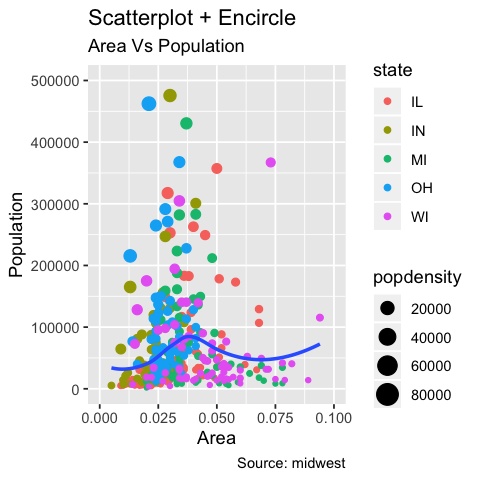

In [44]:
options(scipen = 999)
library(ggplot2)
#library(ggalt)
midwest_select <- midwest[midwest$poptotal > 350000 & 
                            midwest$poptotal <= 500000 & 
                            midwest$area > 0.01 & 
                            midwest$area < 0.1, ]

# Plot
ggplot(midwest, aes(x=area, y=poptotal)) +
  geom_point(aes(col=state, size=popdensity)) +
    geom_smooth(method="loess", se=F) +
     xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) +

  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot + Encircle", 
       caption="Source: midwest")

---
# Task 4
---

Find a creative way to ggplot MLB 2017 games played vs batting average, highlighting players who played more than 100 games in 2017. Use any geom and aesthetic you like.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


## Themes

A key advantage of ggplot is the ability to carry aesthetic styles throughout every plot in a series, in order to keep things like colours and line thicknesses consistent. This is very useful if you're producing a thesis, paper, or a book. Every aspect of a plot can be set and tweaked, which can be tedious, but getting things looking the way you want is important. 

`ggplot2` comes with some pre-loaded themes:

In [ ]:
# Classic theme
ggplot(data=mlbdata,aes(BA,OBP))+geom_point(colour=pitcher)+theme_classic()

In [ ]:
# Light theme
ggplot(data=mlbdata,aes(BA,OBP))+geom_point(colour=pitcher)+theme_light()

In [ ]:
# Dark theme
ggplot(data=mlbdata,aes(BA,OBP))+geom_point(colour=pitcher)+theme_dark()

In [ ]:
# Minimal theme
ggplot(data=mlbdata,aes(BA,OBP))+geom_point(colour=pitcher)+theme_minimal()

Looking through, you can see there have been various decisions made about lines and background colours etc., all of which you can set yourself:

In [ ]:
# Alter the minimal theme
theme_example = function (base_size = 11, base_family = "Helvetica") {
  theme_minimal(base_size = base_size, base_family = base_family) %+replace%
    theme(axis.text = element_text(colour = "grey50"),
          axis.title.x = element_text(colour = "dodgerblue"),
          axis.title.y = element_text(colour = "grey50", angle = 90),
  )
}

In [ ]:
# Example theme
ggplot(data=mlbdata,aes(BA,OBP))+geom_point(colour=pitcher)+theme_example()

All the arguments to a theme are available here: https://ggplot2.tidyverse.org/reference/theme.html


---
# Task 5
---

Modify a theme to suit your tastes and plot anything from the MLB 2017 batting data.

In [ ]:
# Your answer here (feel free to add cells to complete your answer)


# What have you learned and what's next?

The point of today's lab was to understand some basic plotting information

**You should at this point be comfortable:**
 1. Knowing the difference between high-level and low-level plotting
 2. Be able to alter plot attributes
 3. Bulid a ggplot
 4. Create your own ggplot theme

Next week we will get into the good stuff and discuss **Tufte!**


---
# ** A bientôt ** !